# King County Real Estate Price Analysis and Prediction.
## Dataset used from Kaggle
**This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.**

*Link : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download*


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [128]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print('Import Completed!!')

Import Completed!!


In [79]:
#Read Dataset and print head
df = pd.read_csv('kc_house_data_raw.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
#Drop Unnecessary Columns
df = df.drop(columns=['Unnamed: 0','id'])

In [81]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
#Identify NaN values
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [83]:
#Replace NaN with Mean

bed_mean = df['bedrooms'].mean()
bath_mean = df['bathrooms'].mean()
print(bed_mean)
print(bath_mean)

3.37287037037037
2.1157362403369904


In [84]:
df['bedrooms'] = df['bedrooms'].replace(np.nan, bed_mean)
df['bathrooms'] = df['bathrooms'].replace(np.nan, bath_mean)

**Number of houses with unique floor values**

In [85]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


**Boxplot for houses with a waterfront view or without a waterfront view have more price outliers**

Text(0, 0.5, 'Price (in $)')

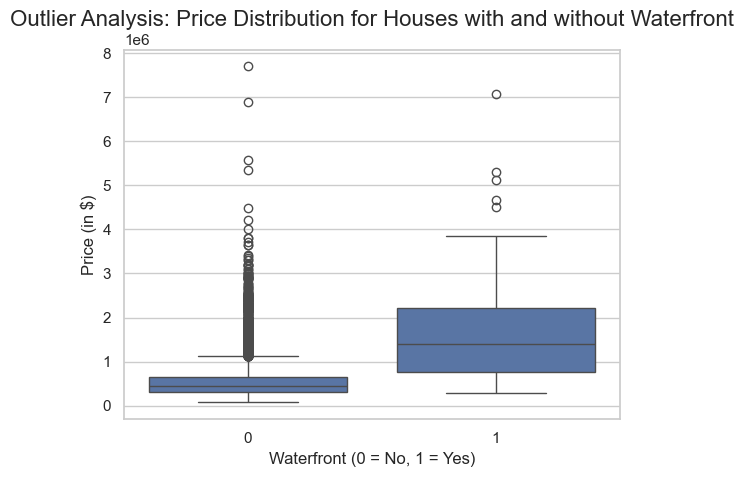

In [101]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Outlier Analysis: Price Distribution for Houses with and without Waterfront', fontsize=16)
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price (in $)', fontsize=12)

**If the feature sqft_above is negatively or positively correlated with price. (Regplot)**

<Axes: xlabel='sqft_above', ylabel='price'>

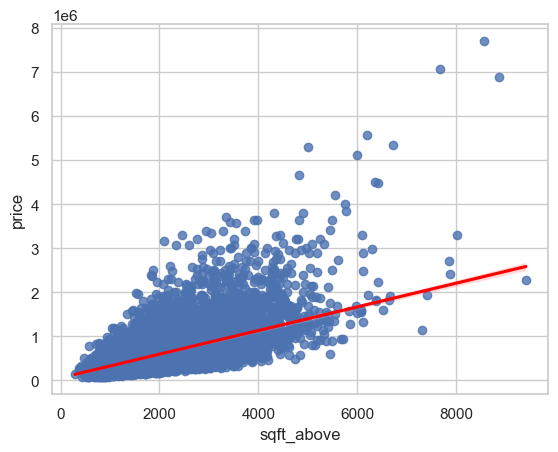

In [87]:
sns.regplot(x='sqft_above',y='price',data=df,line_kws={"color": "red"})

As seen in the plot, positive correlation betwwen sqft_between and price is visible
If the line is upward-sloping, there is a positive correlation (as X increases, Y increases).

**Most Correlated with Price**

In [88]:
df_numeric = df.drop(columns=["date"])  # Remove the non-numeric column
price_corr = df_numeric.corr()["price"].sort_values()
price_corr

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Price Distribution by Bedrooms

C:\Users\rejin\AppData\Local\Temp\ipykernel_15948\1852305823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette="husl")


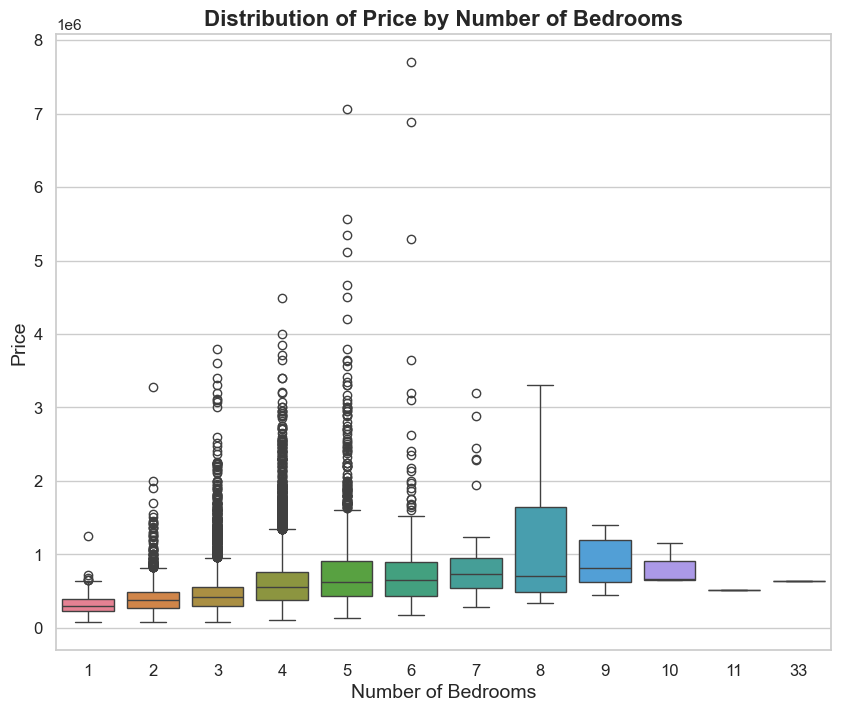

In [102]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")  # Improves readability
sns.boxplot(x='bedrooms', y='price', data=df, palette="husl")
plt.title("Distribution of Price by Number of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


C:\Users\rejin\AppData\Local\Temp\ipykernel_15948\417183376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='grade', y='price', data=df, palette = 'husl')


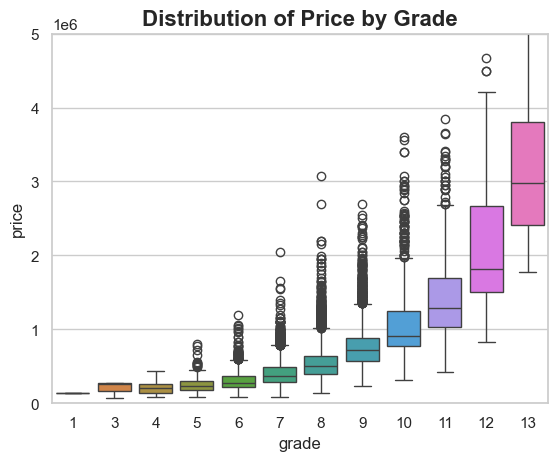

In [107]:
fig = sns.boxplot(x='grade', y='price', data=df, palette = 'husl')
plt.title("Distribution of Price by Grade", fontsize=16, fontweight='bold')
fig.axis(ymin=0, ymax=5000000);

<Axes: >

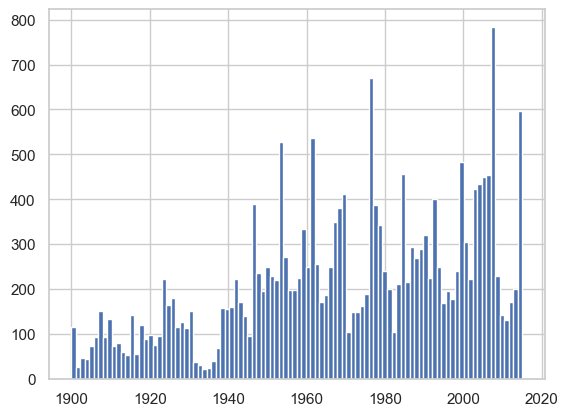

In [106]:
df['yr_built'].hist(bins = 100)

# Model Development
**Use of Linear Regression**
Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [89]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

R^2 is only 0.0004 which is close to 0. So, 'long' is not a good predictor of price.Very Weak Model

Fit a linear regression model using the sqft feature 'sqft_living' and caculate the R^2.

In [90]:
X=df[['sqft_living']]
Y=df['price']
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

R^2 is 0.4 which is better than using 'long'. Moderate Model

## Multiple Regression

In [91]:
X = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 
Y = df['price']
lm2 = LinearRegression()
lm2.fit(X, Y)
lm2.score(X,Y)

0.6576951666037498

R² value of 0.66 (≈ 66%) is a big improvement over the previous 0.00047, meaning this now explains 66% of the variation in house prices based on the selected features

# Splitting to Train and Test Data

In [131]:
from sklearn.model_selection import train_test_split

X = df.drop(['price','date'], axis = 1)
Y = df['price']

# 15 for tst set and 85 for train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create and train the model
lm = LinearRegression()
lm.fit(x_train, y_train)

# Predict on both training and test sets
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

# Calculate R² values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print R² values
print('R² (Training Set):', r2_train)
print('R² (Test Set):', r2_test)

# Check for overfitting
if r2_train > r2_test:
    print("The model might be overfitting because the training R² is higher than the test R².")
else:
    print("The model seems to generalize well as the training and test R² are comparable.")

R² (Training Set): 0.7013386520327233
R² (Test Set): 0.6905323453835237
The model might be overfitting because the training R² is higher than the test R².


Overfitting:
High R² on Training Set: The model performs very well on the training data (R² close to 1).

Low R² on Test Set: The model performs poorly on unseen data (test set), with a significantly lower R² than the training set.

In [156]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
# Compute performance metrics
r2_test = metrics.r2_score(y_test, y_pred)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)
print('R² (Test):', r2_test)
print('Adjusted R² (Test):', adjusted_r2_test)
print('MAE (Test):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Test):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R² (Test): 0.6905323453835237
Adjusted R² (Test): 0.690228813464218
MAE (Test): 128024.3200007042
MSE (Test): 45444595410.149666
RMSE (Test): 213177.38015593885


Text(0, 0.5, 'Predicted Prices')

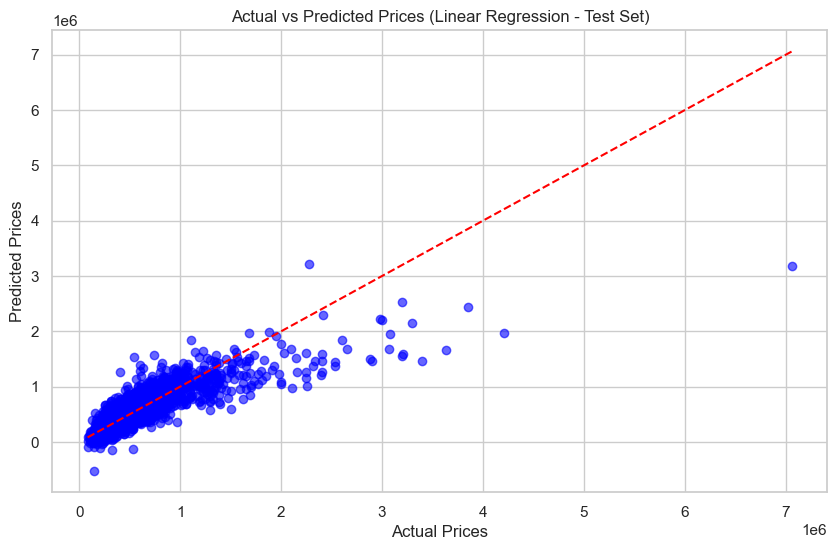

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Plot the ideal line (perfect prediction where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and Title
plt.title('Actual vs Predicted Prices (Linear Regression - Test Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

## Create Pipeline for better automation

In [149]:
ridge_model = Ridge(alpha=100)  # alpha is the regularization strength

# Fit the model on the training data
ridge_model.fit(x_train, y_train)

# Predict using the Ridge model
y_pred_ridge = ridge_model.predict(x_train)

# Compute performance metrics for Ridge
r2_ridge = r2_score(y_train, y_pred_ridge)
n = len(y_train)  # Number of samples
k = x_train.shape[1]  # Number of independent variables
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - k - 1)

# Print the metrics for Ridge
print('R² (Ridge):', r2_ridge)
print('Adjusted R² (Ridge):', adjusted_r2_ridge)
print('MAE (Ridge):', mean_absolute_error(y_train, y_pred_ridge))
print('MSE (Ridge):', mean_squared_error(y_train, y_pred_ridge))
print('RMSE (Ridge):', np.sqrt(mean_squared_error(y_train, y_pred_ridge)))

R² (Ridge): 0.6950405798882432
Adjusted R² (Ridge): 0.694741469733382
MAE (Ridge): 125684.04371338709
MSE (Ridge): 40449858940.23143
RMSE (Ridge): 201121.50292853182


R² = 0.70 means that the model explains 70% of the variance in the target variable (price).

MAE represents the average error in the prediction, meaning that on average, the model's prediction is off

MSE gives a measure of the average squared difference between the actual and predicted values.



Text(0.5, 1.0, 'Actual vs Predicted Prices (Ridge Regression)')

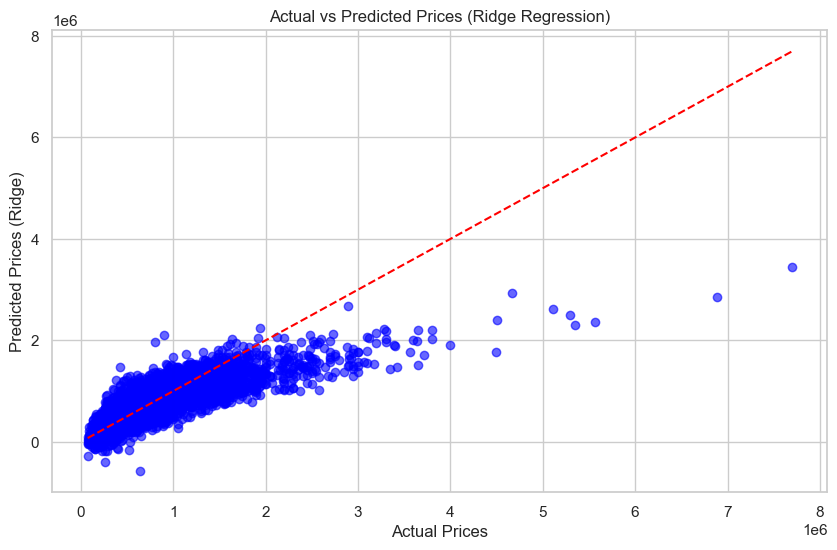

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_ridge, color='blue', alpha=0.6)

# Ideal line (perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Ridge)')
plt.title('Actual vs Predicted Prices (Ridge Regression)')

In [151]:
print("Linear Regression Coefficients:", lm.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)

Linear Regression Coefficients: [-3.49446067e+04  4.23113428e+04  1.11926118e+02  9.46770868e-02
  6.43913846e+03  5.45541406e+05  5.55173697e+04  2.69834112e+04
  9.45876032e+04  7.38985076e+01  3.80276104e+01 -2.58556105e+03
  1.93056913e+01 -5.63569609e+02  6.08755651e+05 -2.12498036e+05
  1.43427202e+01 -3.48518361e-01]
Ridge Regression Coefficients: [-3.66959290e+04  4.21089505e+04  1.13203953e+02  4.71212156e-02
  1.27121296e+04  2.95834296e+05  6.44579509e+04  2.53098011e+04
  9.93698095e+04  7.01861976e+01  4.30177649e+01 -2.83018763e+03
  2.00969094e+01 -3.97595563e+02  4.53491804e+05 -1.37221172e+05
  1.35567275e+01 -3.97551883e-01]
